In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#Loading Data  
data=pd.read_csv("C:\\Users\\busra\\OneDrive\\Masaüstü\\car.csv")

In [3]:
#Print first 5 rows in the dataframe
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#Number of rows and columns
data.shape

(301, 9)

In [5]:
#Get some information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#Check the number of missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#Check distribution of categorical data
data["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [8]:
data["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [9]:
data["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [10]:
#Encoding Fuel Type Column
data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)

In [11]:
data.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)

In [12]:
data.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [13]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [14]:
#Split data Target and features
X=data.drop(columns=["Car_Name","Selling_Price"],axis=1)
Y=data["Selling_Price"]

In [15]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [16]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [17]:
#Split data into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

Model Training 

# - Linear Regression

In [18]:
#loading linear regression model
lin_reg_model=LinearRegression()

In [19]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evulation

In [20]:
#Prediction on Train Data
train_data_predict=lin_reg_model.predict(X_train)

In [21]:
#R squarred error on train data
train_score=metrics.r2_score(Y_train,train_data_predict)
print("R squarred error on train data : ",train_score)

R squarred error on train data :  0.8799451660493708


Visualize Actual Prices and Predicted Prices

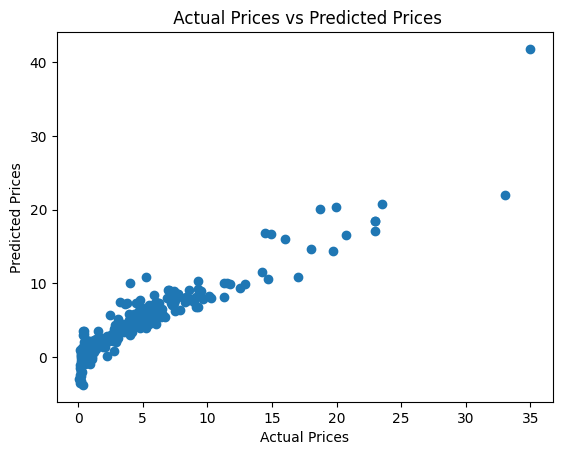

In [22]:
plt.scatter(Y_train,train_data_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [23]:
#Prediction on Test Data
test_data_predict=lin_reg_model.predict(X_test)

In [24]:
#R2 squarred error in test data
test_score=metrics.r2_score(Y_test,test_data_predict)
print("R squarred error in test data : ",test_score)

R squarred error in test data :  0.8365766715026374


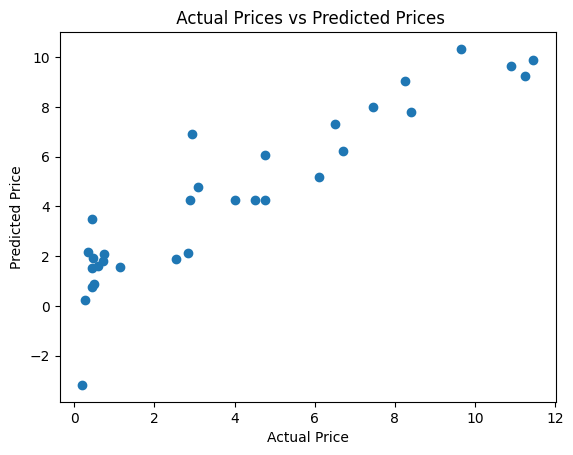

In [25]:
#Visualize Actual Prices and Predicted Prices
plt.scatter(Y_test, test_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# - Lasso Regression

In [26]:
#loading linear regression model
lass_reg_model=Lasso()

In [27]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [28]:
#Prediction on Train Data
train_data_predict=lass_reg_model.predict(X_train)

In [29]:
#R squarred error on train data
train_score=metrics.r2_score(Y_train,train_data_predict)
print("R squarred error on train data : ",train_score)

R squarred error on train data :  0.8427856123435794


Visualize Actual Prices and Predicted Prices

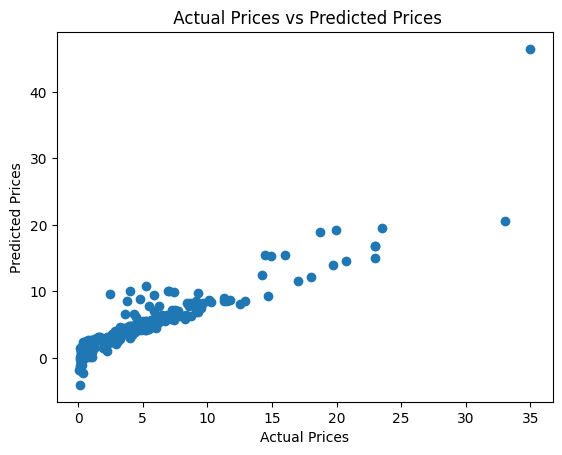

In [30]:
plt.scatter(Y_train,train_data_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [31]:
#Prediction on Test Data
test_data_predict=lass_reg_model.predict(X_test)

In [32]:
#R2 squarred error in test data
test_score=metrics.r2_score(Y_test,test_data_predict)
print("R squarred error in test data : ",test_score)

R squarred error in test data :  0.8709167941173195


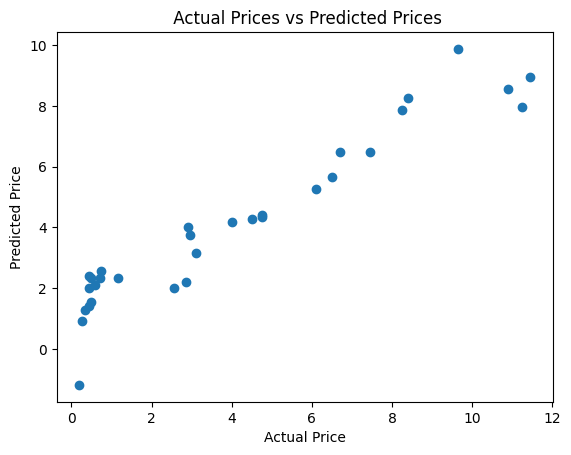

In [33]:
#Visualize Actual Prices and Predicted Prices
plt.scatter(Y_test, test_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()